In [16]:
# Built-in dependencies
from typing import Tuple

# External dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [37]:
N_STOCKS: int = 10
N_OBSERVATIONS: int = 252 * 10
RISK_FACTORS: Tuple = ("MARKET", "VALUE", "MOMENTUM", "SIZE")
K_FACTORS: int = len(RISK_FACTORS)

In [53]:
factor_returns_mu: float = 0.10 / 252
factor_returns_sigma: float = 0.20 / np.sqrt(252)
factor_returns: np.ndarray = (
    np.exp(
        np.random.normal(
            loc=factor_returns_mu - 0.5 * factor_returns_sigma ** 2, 
            scale=factor_returns_sigma, 
            size=(N_OBSERVATIONS, K_FACTORS, 1)
        )
    ) - 1
)
factor_returns, factor_returns.shape

(array([[[ 0.01858331],
         [-0.01973625],
         [ 0.00278685],
         [-0.00182376]],
 
        [[-0.0108145 ],
         [-0.00356964],
         [-0.01174421],
         [ 0.0106828 ]],
 
        [[-0.00886924],
         [-0.00345673],
         [ 0.0081841 ],
         [ 0.01960532]],
 
        ...,
 
        [[ 0.00549537],
         [-0.01475592],
         [-0.00799975],
         [-0.0089837 ]],
 
        [[-0.00182911],
         [-0.01210724],
         [-0.02725898],
         [ 0.01444229]],
 
        [[-0.01039333],
         [ 0.0116324 ],
         [-0.00172718],
         [ 0.00910138]]]),
 (2520, 4, 1))

In [75]:
# On average, let stocks have positive risk factor loadings 
stock_loadings: np.ndarray = np.random.normal(loc=0.10, scale=1, size=(N_OBSERVATIONS, N_STOCKS, K_FACTORS))
stock_loadings, stock_loadings.shape

(array([[[-0.10026026,  0.64618628,  0.49800299,  0.68237434],
         [-1.79278249,  2.77190014, -0.90568987, -0.83571354],
         [-1.05191797, -1.18140994, -0.65966414, -0.91463183],
         ...,
         [ 1.46878075,  0.13084975, -1.02911301,  1.05504656],
         [-0.33220957, -0.24741299,  0.49026796,  0.54015661],
         [ 0.3344052 ,  0.6251536 ,  1.21914826, -1.71481534]],
 
        [[-2.07219537,  1.0843218 , -0.80533826, -0.27080819],
         [-0.24040695,  0.78641986,  0.38939722, -0.85235952],
         [ 0.29806996, -0.10802853,  1.29358432, -0.75967375],
         ...,
         [ 0.24725602,  0.1936087 , -1.51053874, -0.98427672],
         [-0.78331545,  0.54558514, -0.39873672,  1.1946123 ],
         [-1.26949466,  2.56128236, -0.41509045, -0.07948045]],
 
        [[-0.69350498, -0.89835071, -0.2374    ,  1.8151528 ],
         [-0.03863439, -0.07603112,  1.52493057,  1.39383025],
         [ 0.40783999, -1.18670094, -0.08366707, -0.03954054],
         ...,
       

In [70]:
stock_return_noise: np.ndarray = np.random.normal(loc=0.00, scale=0.05 / np.sqrt(252), size=(N_OBSERVATIONS, N_STOCKS))
stock_return_noise

array([[ 0.00057432, -0.00241523,  0.00171633, ...,  0.0032998 ,
         0.00380028, -0.00468245],
       [-0.00122642, -0.00164283,  0.00219332, ...,  0.00259199,
         0.00089636,  0.00514135],
       [ 0.0024643 ,  0.00287815, -0.00072944, ..., -0.00043145,
        -0.00014008,  0.00185827],
       ...,
       [ 0.00038155,  0.00285587,  0.00119367, ...,  0.000683  ,
         0.00891714,  0.00170842],
       [ 0.00114013,  0.00114088, -0.00018543, ...,  0.00137538,
         0.00314035,  0.00042901],
       [-0.00067879,  0.00332647, -0.00105944, ..., -0.0032885 ,
        -0.00117135,  0.00250821]])

In [76]:
stock_returns: np.ndarray = np.matmul(stock_loadings, factor_returns).reshape(N_OBSERVATIONS, N_STOCKS) + stock_return_noise
stock_returns

array([[-0.01389877, -0.09143787,  0.0053145 , ...,  0.02321999,
         0.00289092, -0.00428129],
       [ 0.02387778, -0.01552893, -0.02395211, ...,  0.00645218,
         0.02486465,  0.0137533 ],
       [ 0.04536427,  0.04329031, -0.0017045 , ..., -0.00620789,
         0.00770237,  0.0142998 ],
       ...,
       [-0.02013952,  0.00626992,  0.00044006, ...,  0.00825109,
         0.01647408, -0.0011858 ],
       [-0.02935766, -0.01859701,  0.03771922, ...,  0.00859971,
         0.0379095 ,  0.01025327],
       [-0.02465002, -0.02756599, -0.02591669, ..., -0.00013375,
        -0.00151951, -0.01289766]])

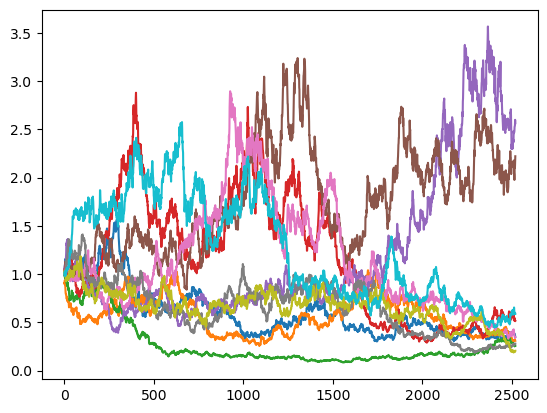

In [78]:
plt.plot(np.cumprod(1 + stock_returns, axis=0))
plt.show()

In [ ]:
stock_returns = np.empty(shape=(N_OBSERVATIONS, N_STOCKS))

for t in range(N_OBSERVATIONS):

    stock_returns[t] = stock_loadings[t].dot() 

stock_returns = 